In [1]:
import scgen
import scanpy as sc

Using TensorFlow backend.


### Reading the  train data

In [2]:
train = sc.read("./tests/data/pancreas.h5ad",
                backup_url="https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1")

/Users/mohammad.lotfollahi/opt/miniconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/Users/mohammad.lotfollahi/opt/miniconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


We need two observation labels "batch" and "cell_type" for our batch_removal procedure.
There exist a "batch" obs but no "cell_type", 
so we add it as a .obs of adata

In [3]:
train.obs["cell_type"] = train.obs["celltype"].tolist()

### UMAP Visualization of the  original uncorrected data  

In [ ]:
sc.pp.neighbors(train)
sc.tl.umap(train)

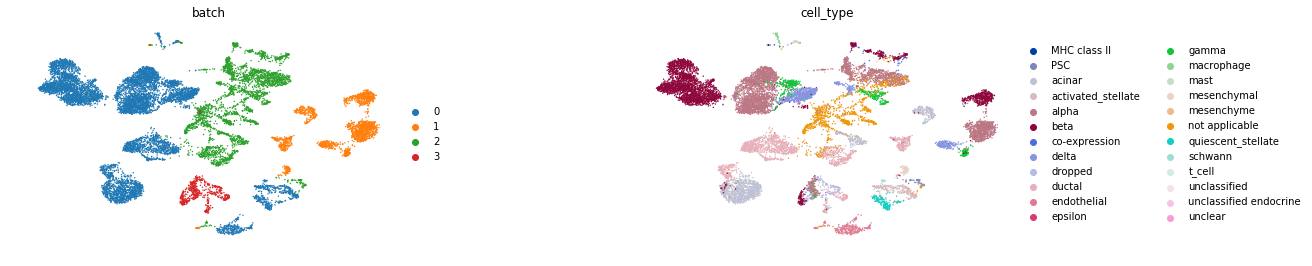

In [6]:
sc.pl.umap(train, color=["batch", "cell_type"], wspace=.5, frameon=False)

### Creating and training the model

In [8]:
network = scgen.VAEArithKeras(x_dimension= train.shape[1], model_path="./models/batch")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 2448)              0         
_________________________________________________________________
encoder (Model)              (None, 100)               2765000   
_________________________________________________________________
decoder (Model)              (None, 2448)              2687248   
Total params: 5,452,248
Trainable params: 5,445,848
Non-trainable params: 6,400
_________________________________________________________________


We train the model for 100 epochs 

In [ ]:
network.train(train_data=train, n_epochs=100)

### Batch Removal

Now, we pass our train (uncorected) adata and network object to batch_removal fucntion which
returns adata of batch corrected data

In [60]:
corrected_adata =  scgen.batch_removal(network, train, batch_key="batch", cell_label_key="cell_type")

###  Visualization of the  corrected gene expression data

In [61]:
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'celltype' as categorical
... storing 'sample' as categorical
... storing 'batch' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'concat_batch' as categorical


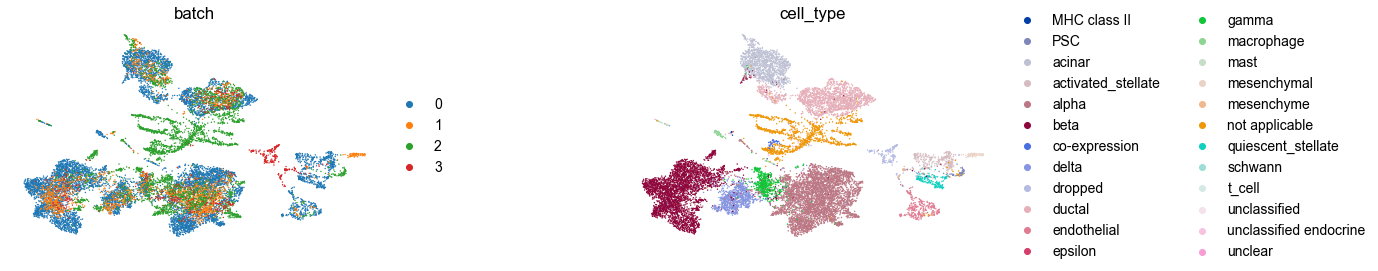

In [62]:
sc.pl.umap(corrected_adata, color=["batch", "cell_type"], wspace=.5, frameon=False)

###  Using uncorrected data

Note that original  `adata.raw` for the adata.raw is saved to `corrected_adata.raw` and you can use that for fruther analaysis

In [63]:
corrected_adata.raw

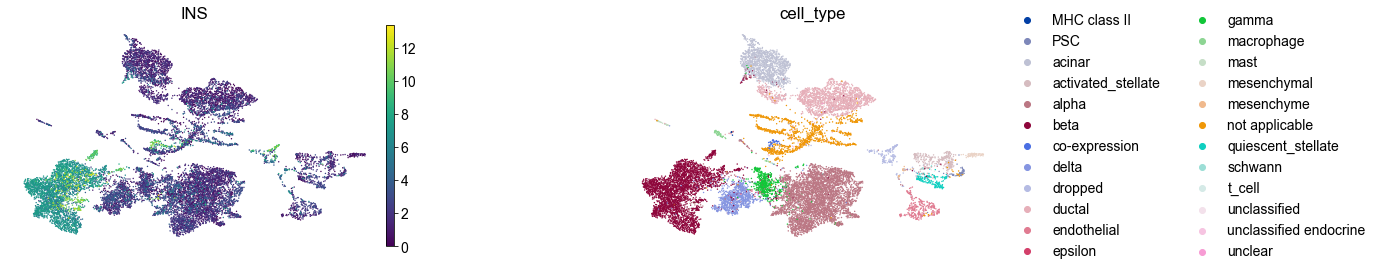

In [65]:
sc.pl.umap(corrected_adata, color=["INS", "cell_type"], wspace=.5, frameon=False, use_raw=True)